In [43]:
import tensorflow.keras as kr
import button_pos_script as btp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = kr.datasets.mnist

In [6]:
(xtrain, ytrain), (xtest, ytest) = data.load_data()

In [13]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
data = btp.pd_events_to_np(pd.read_csv('test3.csv'))

In [35]:
data = data / [1280, 720]
datax = np.copy(data[0])

def sequence(m, n):
    li = []
    for i in range(len(m)-n+1):
        li.append(m[i:i+n])
    return np.array(li)

posty = sequence(datax, 100)

In [40]:
posty.shape

(9901, 100, 2)

In [45]:
li = []

# [-1, -1] : 0
# [-1, 0] : 1
# [-1, 1] : 2
# [0, -1] : 3
# [0, 0] : 4
# [0, 1] : 5
# [1, -1] : 6
# [1, 0] : 7
# [1, 1] : 8

for i in range(len(posty) - 1):
    if (posty[i][0] == [0, 0]).all():
        li.append(4)
    i += 1
    
    if (np.sign(posty[i][0] - posty[i - 1][-1]) == [-1, -1]).all():
        li.append(0)
    elif (np.sign(posty[i][0] - posty[i - 1][-1]) == [-1, 0]).all():
        li.append(1)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [-1, 1]).all():
        li.append(2)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [0, -1]).all():
        li.append(3)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [0, 0]).all():
        li.append(4)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [0, 1]).all():
        li.append(5)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [1, -1]).all():
        li.append(6)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [1, 0]).all():
        li.append(7)
    elif (np.sign(posty[i][0] - posty[i][-1]) == [1, 1]).all():
        li.append(8)
# if (np.sign(posty[1][0] - posty[-1][0]) == [-1, 1]).all():
#    print("works")

postyy = np.array(li)

(array([348.,  62., 580.,   2.,   0.,   0.,   0., 567.,   0.,  99.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

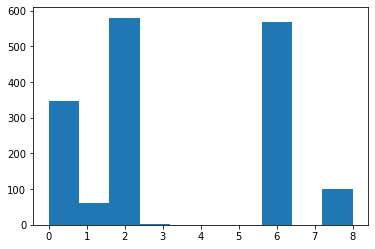

In [56]:
plt.ion()
plt.hist(postyy[postyy != 4])